In [1]:
#Challenge 1
%matplotlib inline
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

df0504=pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190504.txt')
df0511=pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190511.txt')
df0518=pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190518.txt')
df0525=pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190525.txt')
df=pd.concat([df0504,df0511,df0518,df0525]).reset_index()


In [2]:
#Challenge 2, plus other date stuff for later challenges
df['DATETIME']=df['DATE']+' '+df['TIME']
df['DATETIME']=pd.to_datetime(df['DATETIME'])
df['DATE']=pd.to_datetime(df['DATE'])
df['TIME']=pd.to_datetime(df['TIME'])
df['WEEK OF YEAR']=df['DATETIME'].dt.weekofyear
df['DAY OF WEEK']=df['DATETIME'].dt.dayofweek


In [3]:
#Challenge 3
df=df[df['TIME']=='00:00:00']
df['NET ENTRIES']=df.groupby(['C/A','UNIT','SCP','STATION'])['ENTRIES'].diff(-1)*-1

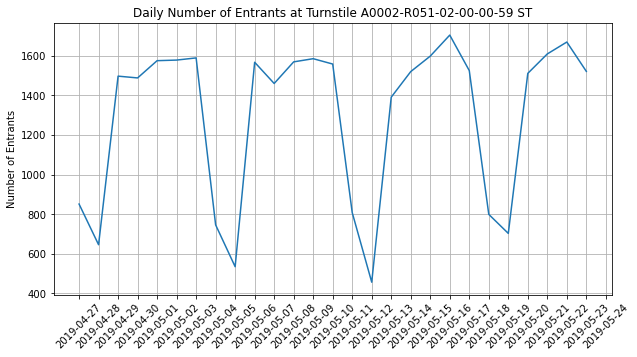

In [4]:
#Challenge 4
logic=(df['C/A']=='A002')&(df['UNIT']=='R051')&(df['SCP']=='02-00-00')&(df['STATION']=='59 ST')
dfsingleturn=df[logic]
plt.figure(figsize=[10,5])
plt.plot(dfsingleturn['DATETIME'],dfsingleturn['NET ENTRIES'])
plt.xticks(dfsingleturn['DATETIME'],rotation=45);
plt.ylabel('Number of Entrants')
plt.grid()
plt.title('Daily Number of Entrants at Turnstile A0002-R051-02-00-00-59 ST');

In [5]:
#Challenge 5
df.groupby(['C/A','UNIT','STATION','DATE'])['NET ENTRIES'].sum()

C/A    UNIT  STATION     DATE      
A002   R051  59 ST       2019-04-27     8394.0
                         2019-04-28     6337.0
                         2019-04-29    13132.0
                         2019-04-30    13664.0
                         2019-05-01    13748.0
                                        ...   
S101A  R070  ST. GEORGE  2019-05-20     7598.0
                         2019-05-21     7898.0
                         2019-05-22     7933.0
                         2019-05-23     7442.0
                         2019-05-24        0.0
Name: NET ENTRIES, Length: 10497, dtype: float64

In [6]:
#Challenge 6
dfstatday=df.groupby(['STATION','DATE','WEEK OF YEAR','DAY OF WEEK'])['NET ENTRIES'].sum()
dfstatday=dfstatday.reset_index()
dfstatday.loc[dfstatday['DATE']=='2019-05-24','NET ENTRIES']=np.NaN

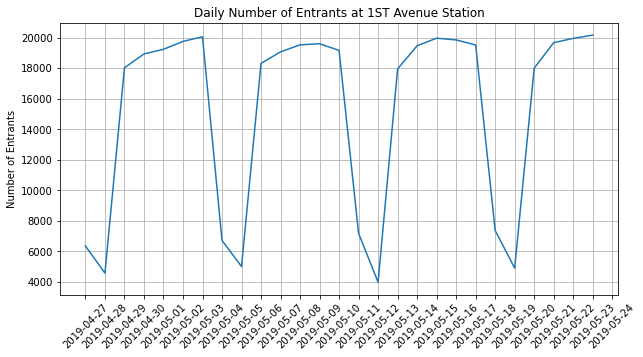

In [7]:
#Challenge 7
dfstatday=dfstatday.reset_index()
dffirstavstat=dfstatday[dfstatday['STATION']=='1 AV']
plt.figure(figsize=[10,5])
plt.plot(dffirstavstat['DATE'],dffirstavstat['NET ENTRIES'])
plt.xticks(dffirstavstat['DATE'],rotation=45);
plt.ylabel('Number of Entrants')
plt.grid()
plt.title('Daily Number of Entrants at 1ST Avenue Station');

In [8]:
dfstatday.head()

#Challenge 8
#for week in df['Week'].unique():
#    plt.plot(df.loc[df['Week']==week,'NET ENTRIES'])
    

,index,STATION,DATE,WEEK OF YEAR,DAY OF WEEK,NET ENTRIES
0,0,1 AV,2019-04-27,17,5,6338.0
1,1,1 AV,2019-04-28,17,6,4555.0
2,2,1 AV,2019-04-29,18,0,18018.0
3,3,1 AV,2019-04-30,18,1,18923.0
4,4,1 AV,2019-05-01,18,2,19226.0


In [24]:
df.head()

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,NET ENTRIES
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,00:00:00,REGULAR,7035249,2384833,2019-04-27,851.0
6,6,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2019,00:00:00,REGULAR,7036100,2385087,2019-04-28,646.0
12,12,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2019,00:00:00,REGULAR,7036746,2385256,2019-04-29,1496.0
18,18,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2019,00:00:00,REGULAR,7038242,2385765,2019-04-30,1487.0
24,24,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/01/2019,00:00:00,REGULAR,7039729,2386229,2019-05-01,1574.0
